<a href="https://colab.research.google.com/github/Shruti9356/House-price-prediction/blob/main/House_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
# Load data
df = pd.read_csv('/content/pune_house_prices.csv')

# Show first few rows
df.head()


,id,area,square_feet,num_bedrooms,num_bathrooms,year_built,has_garage,price
0,1,Viman Nagar,1521,1,1,2016,0,4315847
1,2,Kalyani Nagar,2957,1,2,2003,1,12861115
2,3,Pimpri-Chinchwad,2816,3,2,1993,0,8615274
3,4,Kalyani Nagar,2869,3,1,2000,1,5360008
4,5,Kalyani Nagar,1285,3,3,2012,0,6412778


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             100000 non-null  int64 
 1   area           100000 non-null  object
 2   square_feet    100000 non-null  int64 
 3   num_bedrooms   100000 non-null  int64 
 4   num_bathrooms  100000 non-null  int64 
 5   year_built     100000 non-null  int64 
 6   has_garage     100000 non-null  int64 
 7   price          100000 non-null  int64 
dtypes: int64(7), object(1)
memory usage: 6.1+ MB
None
                  id    square_feet   num_bedrooms  num_bathrooms  \
count  100000.000000  100000.000000  100000.000000  100000.000000   
mean    50000.500000    2151.193570       2.997380       1.999540   
std     28867.657797     777.705719       1.415321       0.817684   
min         1.000000     800.000000       1.000000       1.000000   
25%     25000.750000    1480.000000       2.000000 

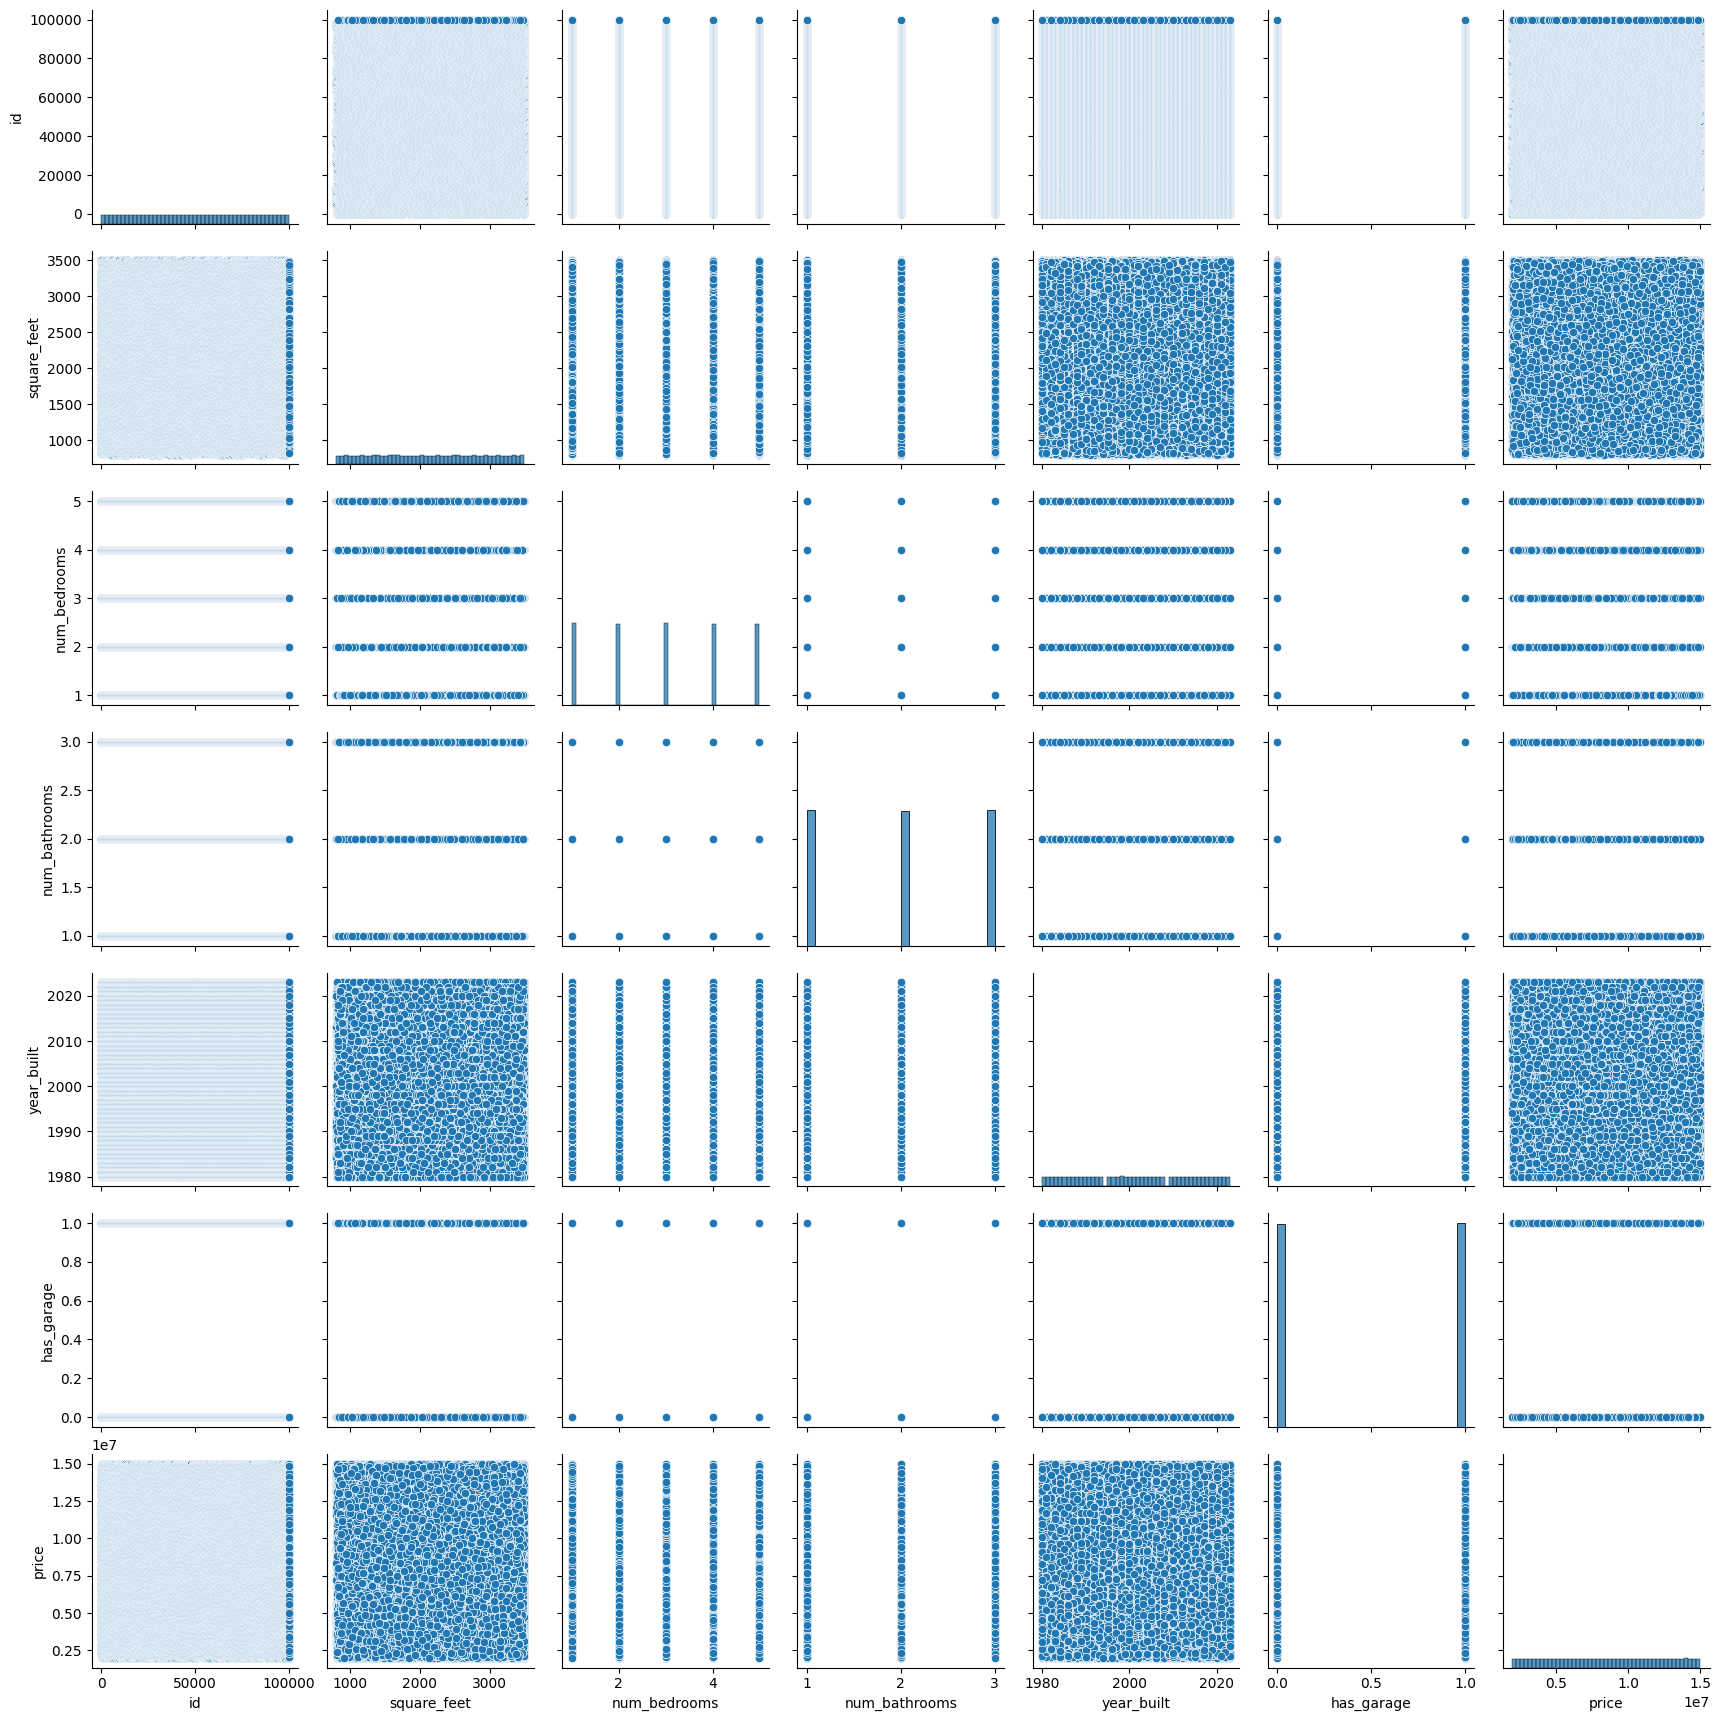

In [3]:
print(df.info())
print(df.describe())
print(df.isnull().sum())  # Check for missing values

sns.pairplot(df)
plt.show()


In [5]:
print(df.columns)



Index(['id', 'area', 'square_feet', 'num_bedrooms', 'num_bathrooms',
       'year_built', 'has_garage', 'price'],
      dtype='object')


In [7]:
# Select features and target
X = df[['square_feet', 'num_bedrooms', 'num_bathrooms', 'has_garage', 'year_built']]
y = df['price']


In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)


In [9]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [10]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared Score:", r2)


Mean Squared Error: 14040211891461.078
R-squared Score: -2.66554708709954e-05


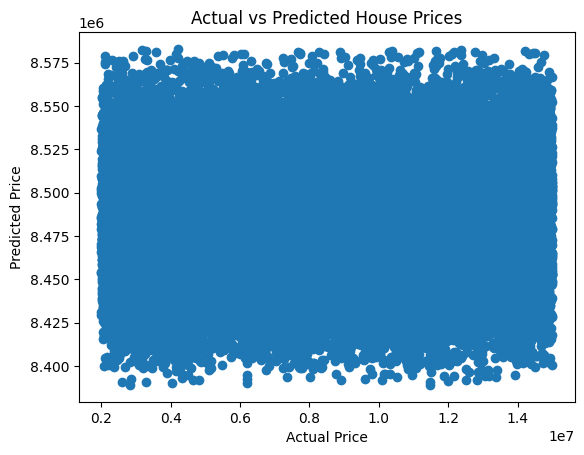

In [11]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted House Prices")
plt.show()


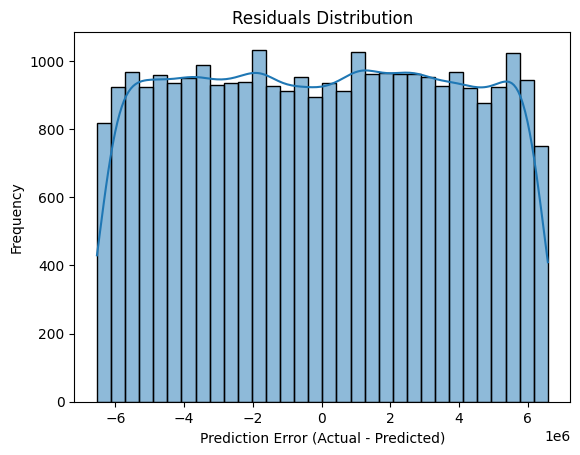

In [12]:
# Calculate residuals
residuals = y_test - y_pred

# Plot residuals distribution
sns.histplot(residuals, kde=True)
plt.title("Residuals Distribution")
plt.xlabel("Prediction Error (Actual - Predicted)")
plt.ylabel("Frequency")
plt.show()


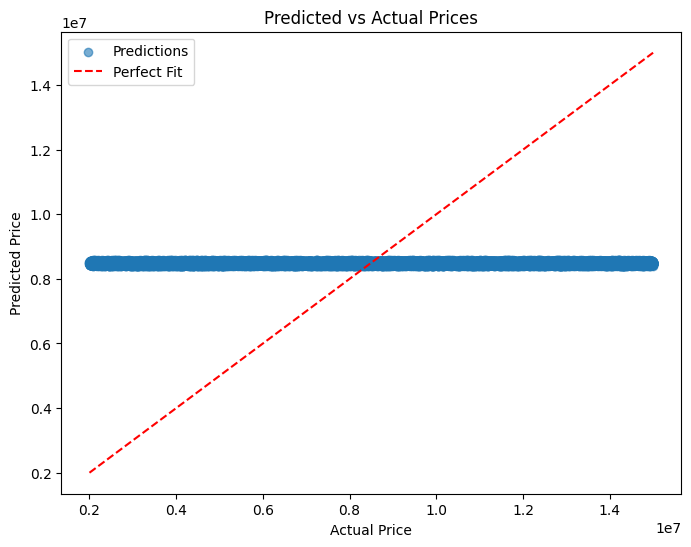

In [13]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, label="Predictions")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label="Perfect Fit")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Predicted vs Actual Prices")
plt.legend()
plt.show()


In [14]:
coeff_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})

print(coeff_df)


         Feature   Coefficient
0    square_feet    -10.049631
1   num_bedrooms  11886.789474
2  num_bathrooms    916.663850
3     has_garage -12998.517782
4     year_built  -2511.512240


In [15]:
import joblib

# Save the model to a file
joblib.dump(model, 'linear_regression_model.pkl')

# Later you can load it like this:
# model = joblib.load('linear_regression_model.pkl')


['linear_regression_model.pkl']